# Project

### [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings)

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. 

### File descriptions

- train_users.csv - the training set of users


- test_users.csv - the test set of users
 - id: user id
 - date_account_created: the date of account creation
 - timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
 - date_first_booking: date of first booking
 - gender
 - age
 - signup_method
 - signup_flow: the page a user came to signup up from
 - language: international language preference
 - affiliate_channel: what kind of paid marketing
 - affiliate_provider: where the marketing is e.g. google, craigslist, other
 - first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
 - signup_app
 - first_device_type
 - first_browser
 - country_destination: this is the target variable you are to predict


- sessions.csv - web sessions log for users
 - user_id: to be joined with the column 'id' in users table
 - action
 - action_type
 - action_detail
 - device_type
 - secs_elapsed


- countries.csv - summary statistics of destination countries in this dataset and their locations
 - age_gender_bkts.csv - summary statistics of users' age group, gender, country of destination
 - sample_submission.csv - correct format for submitting your predictions

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
countries = pd.read_csv('data/countries.csv')
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [3]:
test = pd.read_csv('data/test_users.csv')
test['dataset'] = 'test'
print((test.info()))
test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 16 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dataset                    62096 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 7.6+ MB
None


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dataset
59537,b9jta61s0d,2014-09-26,20140926205413,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Moweb,iPhone,Mobile Safari,test
36382,ore1m5q3fl,2014-08-22,20140822010052,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,test
14703,znh7jiu8en,2014-07-23,20140723042529,NaN,-unknown-,NaN,google,12,en,direct,direct,untracked,Android,Android Phone,-unknown-,test


In [4]:
train = pd.read_csv('data/train_users_2.csv')
train['dataset'] = 'train'
print(train.info())
train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dataset                    213451 non-null object
dtypes: float64(1), int64(2), object(14)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,dataset
32061,6791njw8pq,2012-07-15,20120715195258,NaN,MALE,NaN,basic,0,en,direct,direct,linked,Web,Mac Desktop,Safari,NDF,train
207561,dqstguju3b,2014-06-20,20140620050937,2014-06-24,-unknown-,NaN,basic,24,en,direct,direct,linked,Moweb,iPhone,Mobile Safari,US,train
213181,ii8kqtg7ca,2014-06-30,20140630164823,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,train


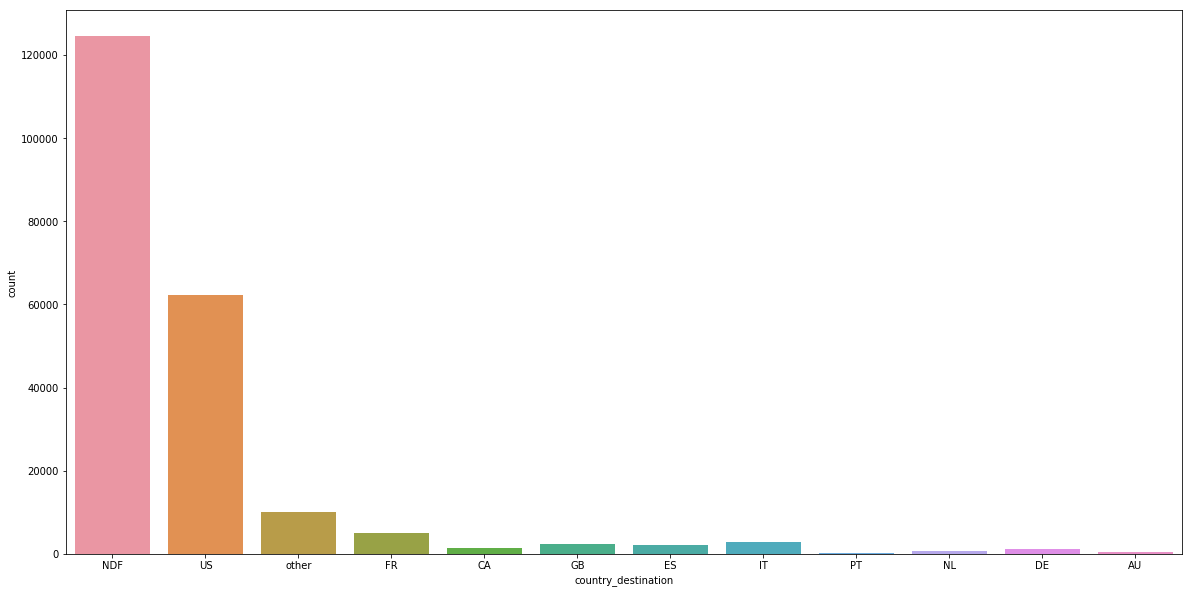

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'country_destination', data = train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

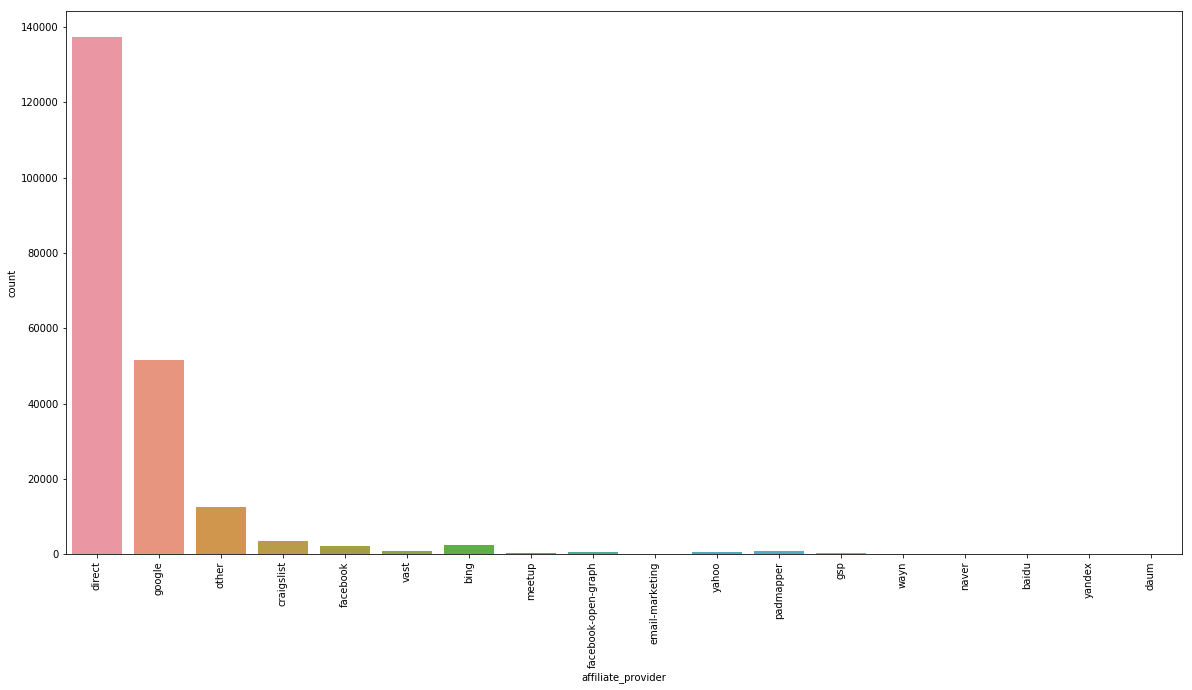

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'affiliate_provider', data = train)
plt.xticks(rotation = 'vertical')

In [7]:
train['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [8]:
data = pd.concat([train, test])
print(data.info())
data.sample(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 17 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
dataset                    275547 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(14)
m

,affiliate_channel,affiliate_provider,age,country_destination,dataset,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
192101,direct,direct,NaN,NDF,train,2014-05-20,NaN,linked,IE,Windows Desktop,-unknown-,o8yj0lilke,en,Web,0,basic,20140520054806
52148,direct,direct,NaN,NaN,test,2014-09-14,NaN,untracked,-unknown-,iPhone,-unknown-,g7yp41jgsf,en,iOS,25,basic,20140914233702
132183,direct,direct,19.0,ES,train,2013-12-13,2013-12-13,untracked,Firefox,Windows Desktop,MALE,30ykpkyzw8,en,Web,0,basic,20131213085612


In [9]:
columns_to_drop = ['age','id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'first_affiliate_tracked', 
                   'signup_app', 'first_device_type', 'first_browser']

In [10]:
data = data.drop(columns_to_drop, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 8 columns):
affiliate_channel      275547 non-null object
affiliate_provider     275547 non-null object
country_destination    213451 non-null object
dataset                275547 non-null object
gender                 275547 non-null object
language               275547 non-null object
signup_flow            275547 non-null int64
signup_method          275547 non-null object
dtypes: int64(1), object(7)
memory usage: 18.9+ MB


In [11]:
# DUMMY VARIABLES

gender = pd.get_dummies(data['gender'], drop_first = True)
print('gender:\t'.upper(), data['gender'].unique())

signup_method = pd.get_dummies(data['signup_method'], drop_first = False)
print('signup_method:\t'.upper(), data['signup_method'].unique())

signup_flow = pd.get_dummies(data['signup_flow'], drop_first = False)
print('c:  '.upper(), data['signup_flow'].unique())

language = pd.get_dummies(data['language'], drop_first = False)
print('language:\t'.upper(), data['language'].unique())

affiliate_channel = pd.get_dummies(data['affiliate_channel'], drop_first=False)
print('affiliate_channel:\t'.upper(), data['affiliate_channel'].unique())

affiliate_provider = pd.get_dummies(data['affiliate_provider'], drop_first=False)
print('affiliate_provider:\t'.upper(), data['affiliate_provider'].unique())

data1 = data.drop(['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider'], axis = 1)

data1 = pd.concat([data1, gender, signup_method, language, affiliate_channel, affiliate_provider], axis = 1)

country_destination_dict = {'US': 1, 'CA': 2, 'FR': 3, 'IT': 4, 'ES': 5, 'GB': 6, 'NL': 7, 'DE': 8, 'AU': 9, 'PT': 10, 'NDF': 11, 'other': 12}

data1['country_destination_id'] = data1['country_destination'].map(country_destination_dict)

data1.info()

data1.sample(5)

GENDER:	 ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
SIGNUP_METHOD:	 ['facebook' 'basic' 'google' 'weibo']
C:   [ 0  3  2  1 24  8  6  5 10 25 12  4 16 15 20 21 23 14]
LANGUAGE:	 ['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is' '-unknown-']
AFFILIATE_CHANNEL:	 ['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
AFFILIATE_PROVIDER:	 ['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 62 columns):
country_destination       213451 non-null object
dataset                   275547 non-null object
FEMALE                    275547 non-null uint8
MALE                      275547 non-null uint8
OTHER                     275547 non-null uint8
basic                     27

,country_destination,dataset,FEMALE,MALE,OTHER,basic,facebook,google,weibo,-unknown-,...,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex,country_destination_id
201949,NDF,train,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
54141,NDF,train,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,11.0
94362,US,train,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
17372,NDF,train,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,11.0
11473,NaN,test,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [12]:
test_data = data1[data1['dataset'] == 'test']
test_data = test_data.drop('dataset', axis = 1)
print('Number of Country destination (Checking):', test_data['country_destination'].unique())
test_data.head(3)

Number of Country destination (Checking): [nan]


,country_destination,FEMALE,MALE,OTHER,basic,facebook,google,weibo,-unknown-,ca,...,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex,country_destination_id
0,NaN,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


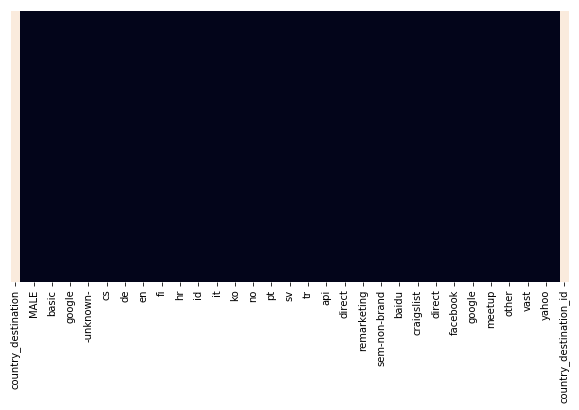

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data = test_data.isnull(), yticklabels=False, cbar = False)

In [14]:
train_data = data1[data1['dataset'] == 'train']
train_data = train_data.drop('dataset', axis = 1)
train_data.sample(3)

,country_destination,FEMALE,MALE,OTHER,basic,facebook,google,weibo,-unknown-,ca,...,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex,country_destination_id
27604,US,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
39617,US,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
72278,NDF,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0


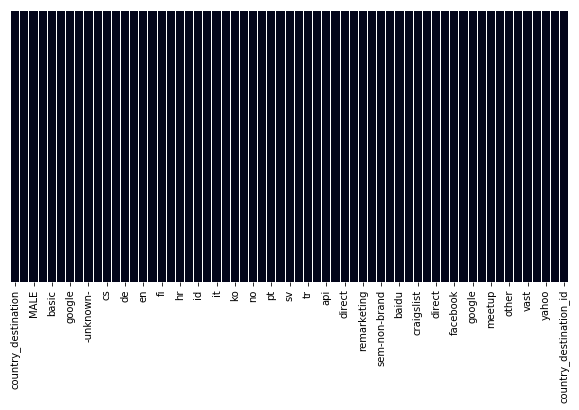

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data = train_data.isnull(), yticklabels=False, cbar = False)

In [16]:
train_data['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [17]:
X_test = test_data.drop(['country_destination', 'country_destination_id'], axis = 1)
print(X_test.shape)

X_train = train_data.drop(['country_destination', 'country_destination_id'], axis = 1)
print(X_train.shape)

y_test = test_data['country_destination']
print(y_test.shape)

y_train = train_data['country_destination']
print(y_train.shape)

y_train_ln = train_data['country_destination_id']
print(y_train_ln.shape)

(62096, 59)
(213451, 59)
(62096,)
(213451,)
(213451,)


In [18]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

logmodel = LogisticRegression()
lnmodel = LinearRegression()
dtmodel = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

In [19]:
import collections

In [25]:
# LOGISTIC REGRESSION

logmodel.fit(X_train, y_train)
logmodel_predictions = logmodel.predict(X_test)
num_of_logmodel_pred = collections.Counter(logmodel_predictions)
num_of_logmodel_pred

Counter({'NDF': 49790, 'US': 12306})

In [21]:
pred_df_logmodel = pd.concat([X_test, pd.DataFrame(logmodel_predictions, columns = ['logmodel_predictions'])], axis = 1)
pred_df_logmodel.sample(10)

,FEMALE,MALE,OTHER,basic,facebook,google,weibo,-unknown-,ca,cs,...,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex,logmodel_predictions
47307,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,US
58724,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
37885,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
982,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
60973,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
57271,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NDF
38058,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
37628,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
55948,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
13662,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF


In [22]:
type(logmodel_predictions)

numpy.ndarray

In [26]:
# DECISION TREE

dtmodel.fit(X_train, y_train)
dtmodel_predictions = dtmodel.predict(X_test)
num_of_dtmodel_pred = collections.Counter(dtmodel_predictions)
num_of_dtmodel_pred

Counter({'NDF': 49437,
         'US': 12631,
         'DE': 3,
         'other': 18,
         'GB': 2,
         'ES': 3,
         'FR': 2})

In [28]:
num_of_dtmodel_pred.keys()

dict_keys(['NDF', 'US', 'DE', 'other', 'GB', 'ES', 'FR'])

In [24]:
pred_df_dtmodel = pd.concat([X_test, pd.DataFrame(dtmodel_predictions, columns = ['dtmodel_predictions'])], axis = 1)
pred_df_dtmodel.sample(10)

,FEMALE,MALE,OTHER,basic,facebook,google,weibo,-unknown-,ca,cs,...,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex,dtmodel_predictions
48957,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,US
53798,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
23579,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
23715,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
9484,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,US
37387,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
23382,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
9147,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
55354,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
27617,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NDF
